# Clean

In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import ast
import time
from datetime import timedelta
from datetime import datetime as dt


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df =pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/koufodinaspt.csv')
df

date  ... day
0    2021-09-10 14:42:00+00:00  ...  10
1    2021-08-19 11:51:00+00:00  ...  19
2    2021-07-30 18:32:00+00:00  ...  30
3    2021-07-14 15:30:11+00:00  ...  14
4    2021-06-01 04:25:00+00:00  ...   1
..                         ...  ...  ..
317  2019-05-04 15:53:00+00:00  ...   4
318  2019-05-04 07:43:00+00:00  ...   4
319  2019-05-02 16:57:00+00:00  ...   2
320  2019-03-31 19:03:00+00:00  ...  31
321  2019-03-29 18:11:58+00:00  ...  29

[322 rows x 7 columns]

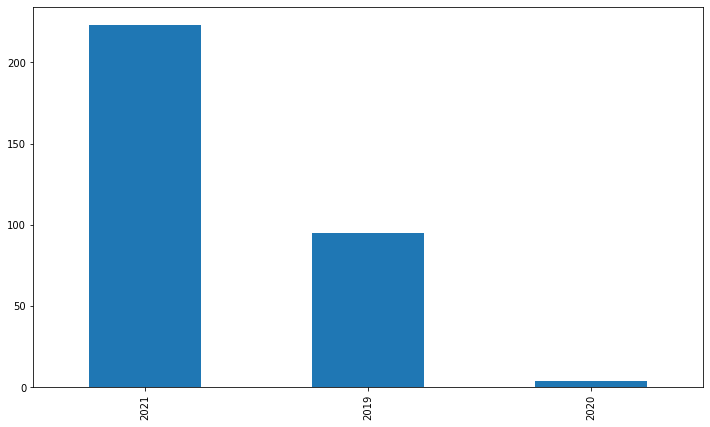

In [4]:
#pote eixame ta perissotera arthra
df["year"].value_counts().plot(kind='bar', figsize=(12,7))


In [5]:
#df['2021-03': '2021-01'].value_counts().plot(kind='bar', figsize=(12,7))


In [6]:
df['headline'].str.contains("Κουφοντίνα").value_counts()


True     252
False     70
Name: headline, dtype: int64

In [7]:
df['summary'].str.contains("απεργία πείνας").value_counts()


False    292
True      30
Name: summary, dtype: int64

In [8]:
df['summary'].str.contains("17 Νοέμβρη").value_counts()


False    299
True      23
Name: summary, dtype: int64

In [9]:
df['summary'].str.contains("τρομοκράτη").value_counts()


False    317
True       5
Name: summary, dtype: int64

In [10]:
df['summary'].str.contains("απεργός πείνας").value_counts()


False    322
Name: summary, dtype: int64

In [11]:
df['summary'].str.contains("βαρυποινίτης").value_counts()


False    320
True       2
Name: summary, dtype: int64

In [12]:
df['summary'].str.contains("πολυισοβίτης").value_counts()


False    317
True       5
Name: summary, dtype: int64

In [13]:
df['summary'].str.contains("τρομοκράτης").value_counts()


False    321
True       1
Name: summary, dtype: int64

In [14]:
df['summary'].str.contains("τρομοκρατική ενέργεια ").value_counts()


False    322
Name: summary, dtype: int64

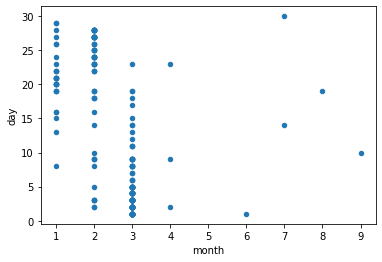

In [15]:
#poious mines dimosieutikan ta perissotera arthra gia to 2021
df[df['year']==2021].plot.scatter(x="month", y="day")


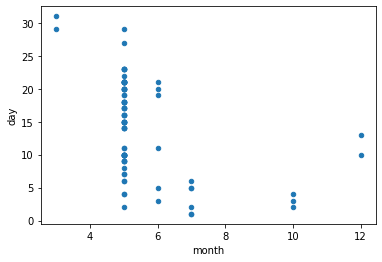

In [16]:
#poious mines dimosieutikan ta perissotera arthra gia to 2019
df[df['year']==2019].plot.scatter(x="month", y="day")


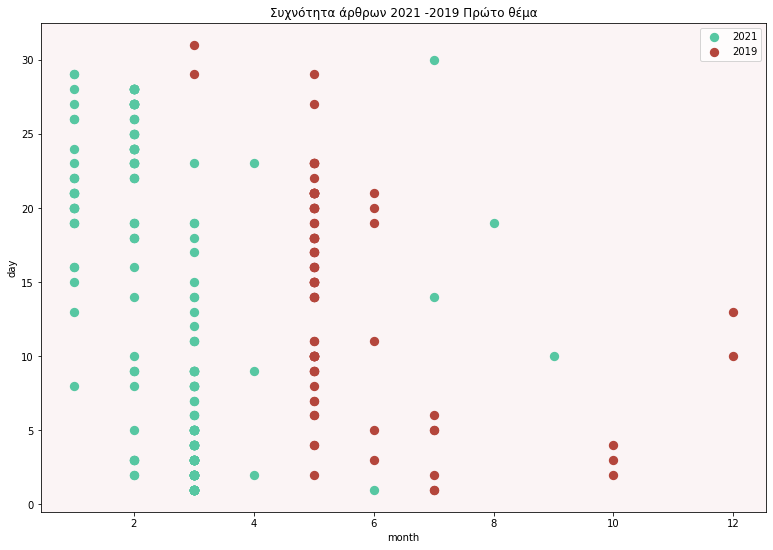

In [17]:
#sygkrisi 2021 -2019
ax= df[df['year']==2021].plot.scatter(x="month", y="day", color='#57C7A2',linewidth=3, label="2021", s=40)
ax.set_facecolor('#FBF4F5')
df[df['year']==2019].plot.scatter(x="month", y="day", color="#B4463C",linewidth=3, label ="2019", ax=ax, figsize=(13,9),s=40, title="Συχνότητα άρθρων 2021 -2019 Πρώτο θέμα")

In [18]:
%matplotlib inline

# Sentiment Analysis PT

In [19]:
!python -m spacy download el_core_news_sm


     |████████████████████████████████| 11.4 MB 6.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [20]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer


In [22]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [23]:
emolex_df.tail()


word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [24]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [25]:
emolex_df.tail()


index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [26]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [27]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [28]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(df['summary'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [29]:
wordcount_df.shape


(322, 13161)

In [30]:
emolex_df.head()


index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [31]:
emolex_df[emolex_df.Anger == 1].tail()


index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [32]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [33]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [34]:
df

date  ... fear
0    2021-09-10 14:42:00+00:00  ...    1
1    2021-08-19 11:51:00+00:00  ...    1
2    2021-07-30 18:32:00+00:00  ...    1
3    2021-07-14 15:30:11+00:00  ...    2
4    2021-06-01 04:25:00+00:00  ...    0
..                         ...  ...  ...
317  2019-05-04 15:53:00+00:00  ...    2
318  2019-05-04 07:43:00+00:00  ...    0
319  2019-05-02 16:57:00+00:00  ...    1
320  2019-03-31 19:03:00+00:00  ...    0
321  2019-03-29 18:11:58+00:00  ...    1

[322 rows x 17 columns]

# Date index & resample

In [35]:
df.dtypes

date            object
headline        object
url             object
summary         object
year             int64
month            int64
day              int64
anger            int64
positivity       int64
joy              int64
disgust          int64
surprise         int64
trust            int64
anticipation     int64
sadness          int64
negative         int64
fear             int64
dtype: object

In [36]:
from datetime import timedelta
from datetime import datetime as dt

df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True, format='%Y %m %d %H:%M:%S')
df

date  ... fear
0   2021-09-10 14:42:00+00:00  ...    1
1   2021-08-19 11:51:00+00:00  ...    1
2   2021-07-30 18:32:00+00:00  ...    1
3   2021-07-14 15:30:11+00:00  ...    2
4   2021-06-01 04:25:00+00:00  ...    0
..                        ...  ...  ...
317 2019-05-04 15:53:00+00:00  ...    2
318 2019-05-04 07:43:00+00:00  ...    0
319 2019-05-02 16:57:00+00:00  ...    1
320 2019-03-31 19:03:00+00:00  ...    0
321 2019-03-29 18:11:58+00:00  ...    1

[322 rows x 17 columns]

In [37]:
df.dtypes

date            datetime64[ns, UTC]
headline                     object
url                          object
summary                      object
year                          int64
month                         int64
day                           int64
anger                         int64
positivity                    int64
joy                           int64
disgust                       int64
surprise                      int64
trust                         int64
anticipation                  int64
sadness                       int64
negative                      int64
fear                          int64
dtype: object

In [38]:
df.set_index('date' , inplace=True)


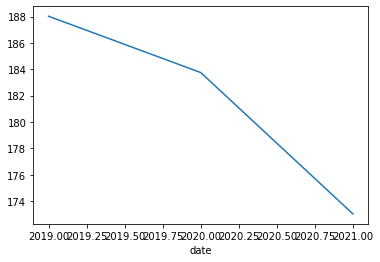

In [39]:
df['summary'].str.len().groupby(by=df.index.year).mean().plot()


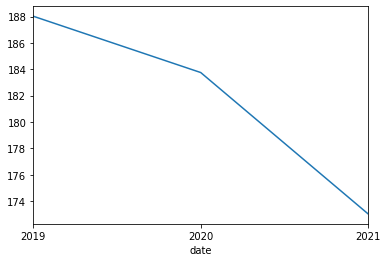

In [40]:
df['summary'].str.len().resample('A').mean().plot()


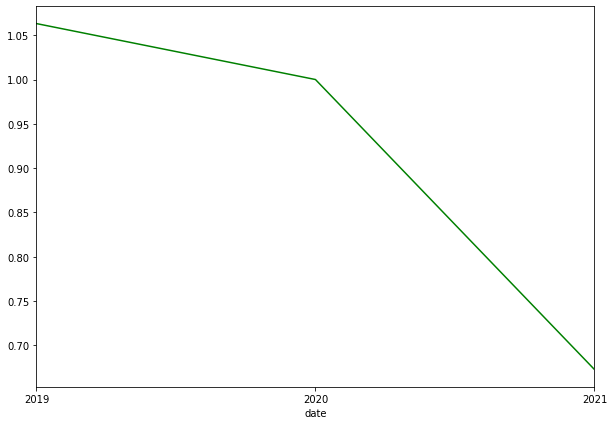

In [41]:
df['positivity'].resample('A').mean().plot(label = 'positivity', color='green', figsize=(10,7))


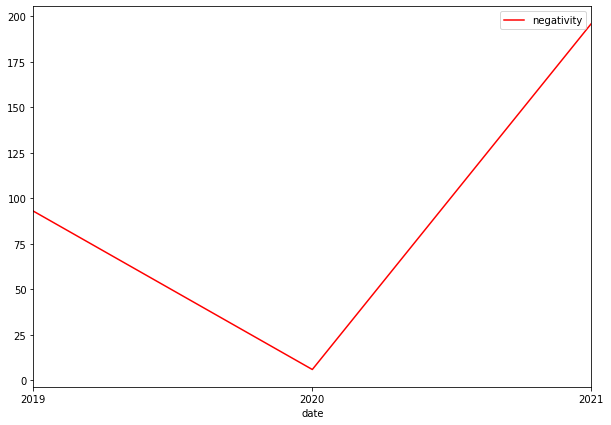

In [42]:
df['negative'].resample('A').sum().plot(color = 'red',label = 'negativity', figsize=(10,7)).legend()


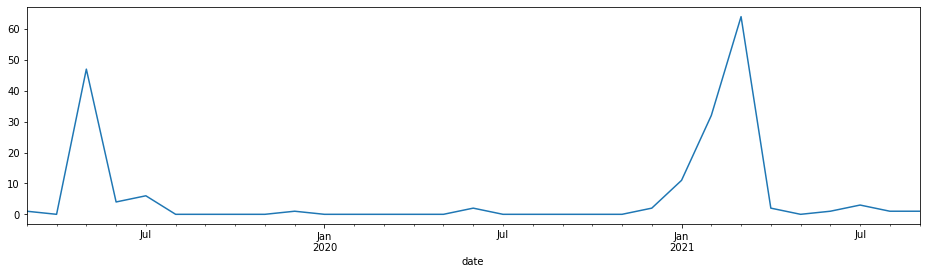

In [43]:
df['anger'].resample('M').sum().plot(figsize=(16,4))


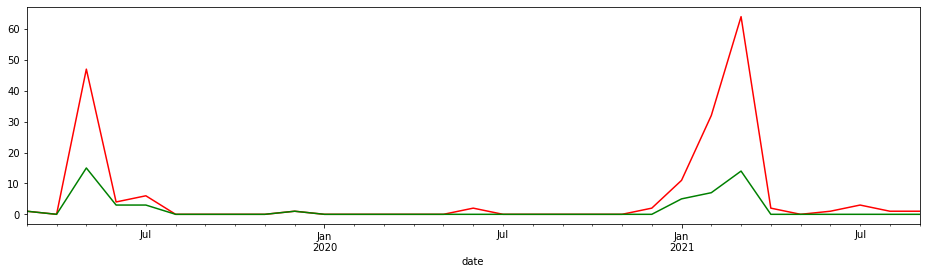

In [44]:
ax = df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
df['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

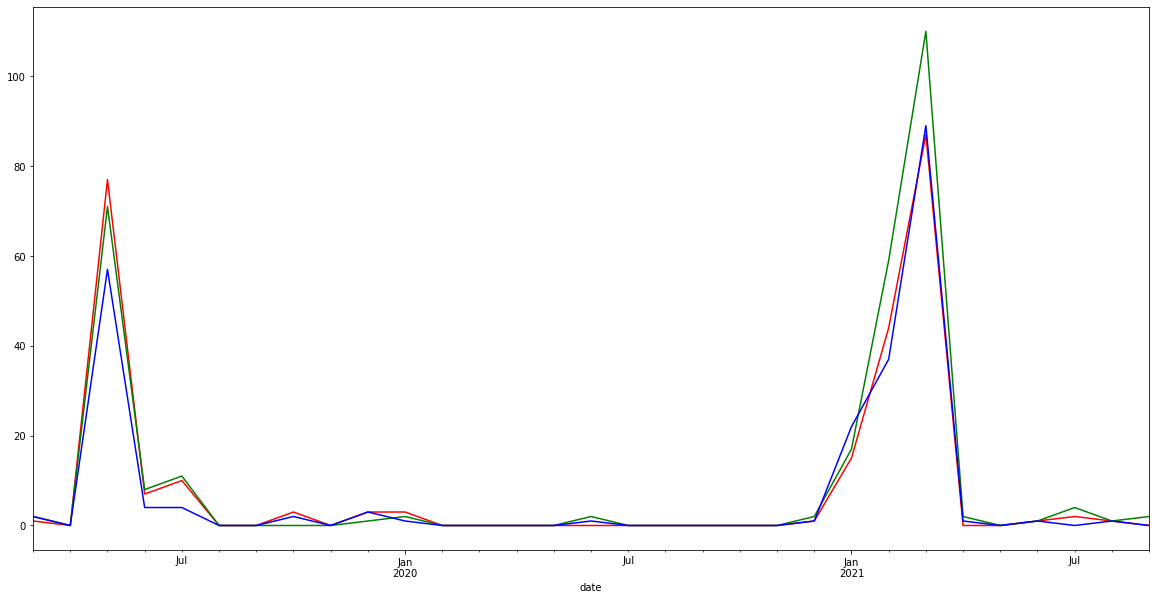

In [45]:
ax = df['positivity'].resample('M').sum().plot(figsize=(20,10), color = 'red')
df['negative'].resample('M').sum().plot(figsize=(20,10), ax = ax, color = 'green')
df['trust'].resample('M').sum().plot(figsize=(20,10), ax = ax, color = 'blue')

In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import glob

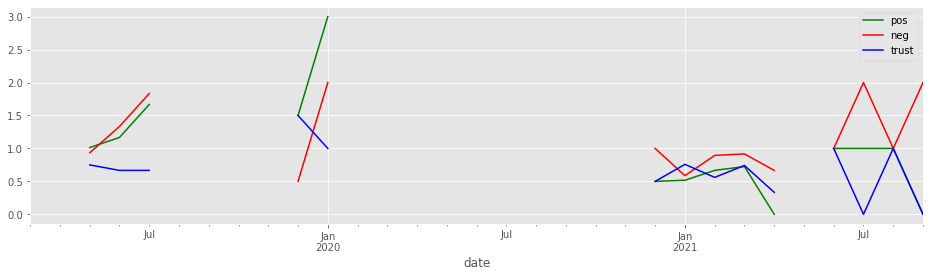

In [47]:
ax = df['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
df['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

# Text analysis

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [49]:

stop_list = ['λέω', 'μιλάω', 'αναφέρω', 'δηλώνω', 'καλώ', 'λέω', 'θέλω', 'μπορώ'
]

In [50]:
stop_list.append(list)

In [51]:
list(nlp.Defaults.stop_words)[0:20]


['εντός',
 'άλλης',
 'όλους',
 'οι',
 'ταύτα',
 'τόσα',
 'όλην',
 'ώστε',
 'πια',
 'τούτο',
 'μόνες',
 'τέτοιους',
 'κανενός',
 'ο',
 'σου',
 'ευθύς',
 'προ',
 'τελευταίος',
 'ξανά',
 'πούθε']

In [52]:
text = df['summary'].str.cat(sep = ' ').replace("amp", ' ')


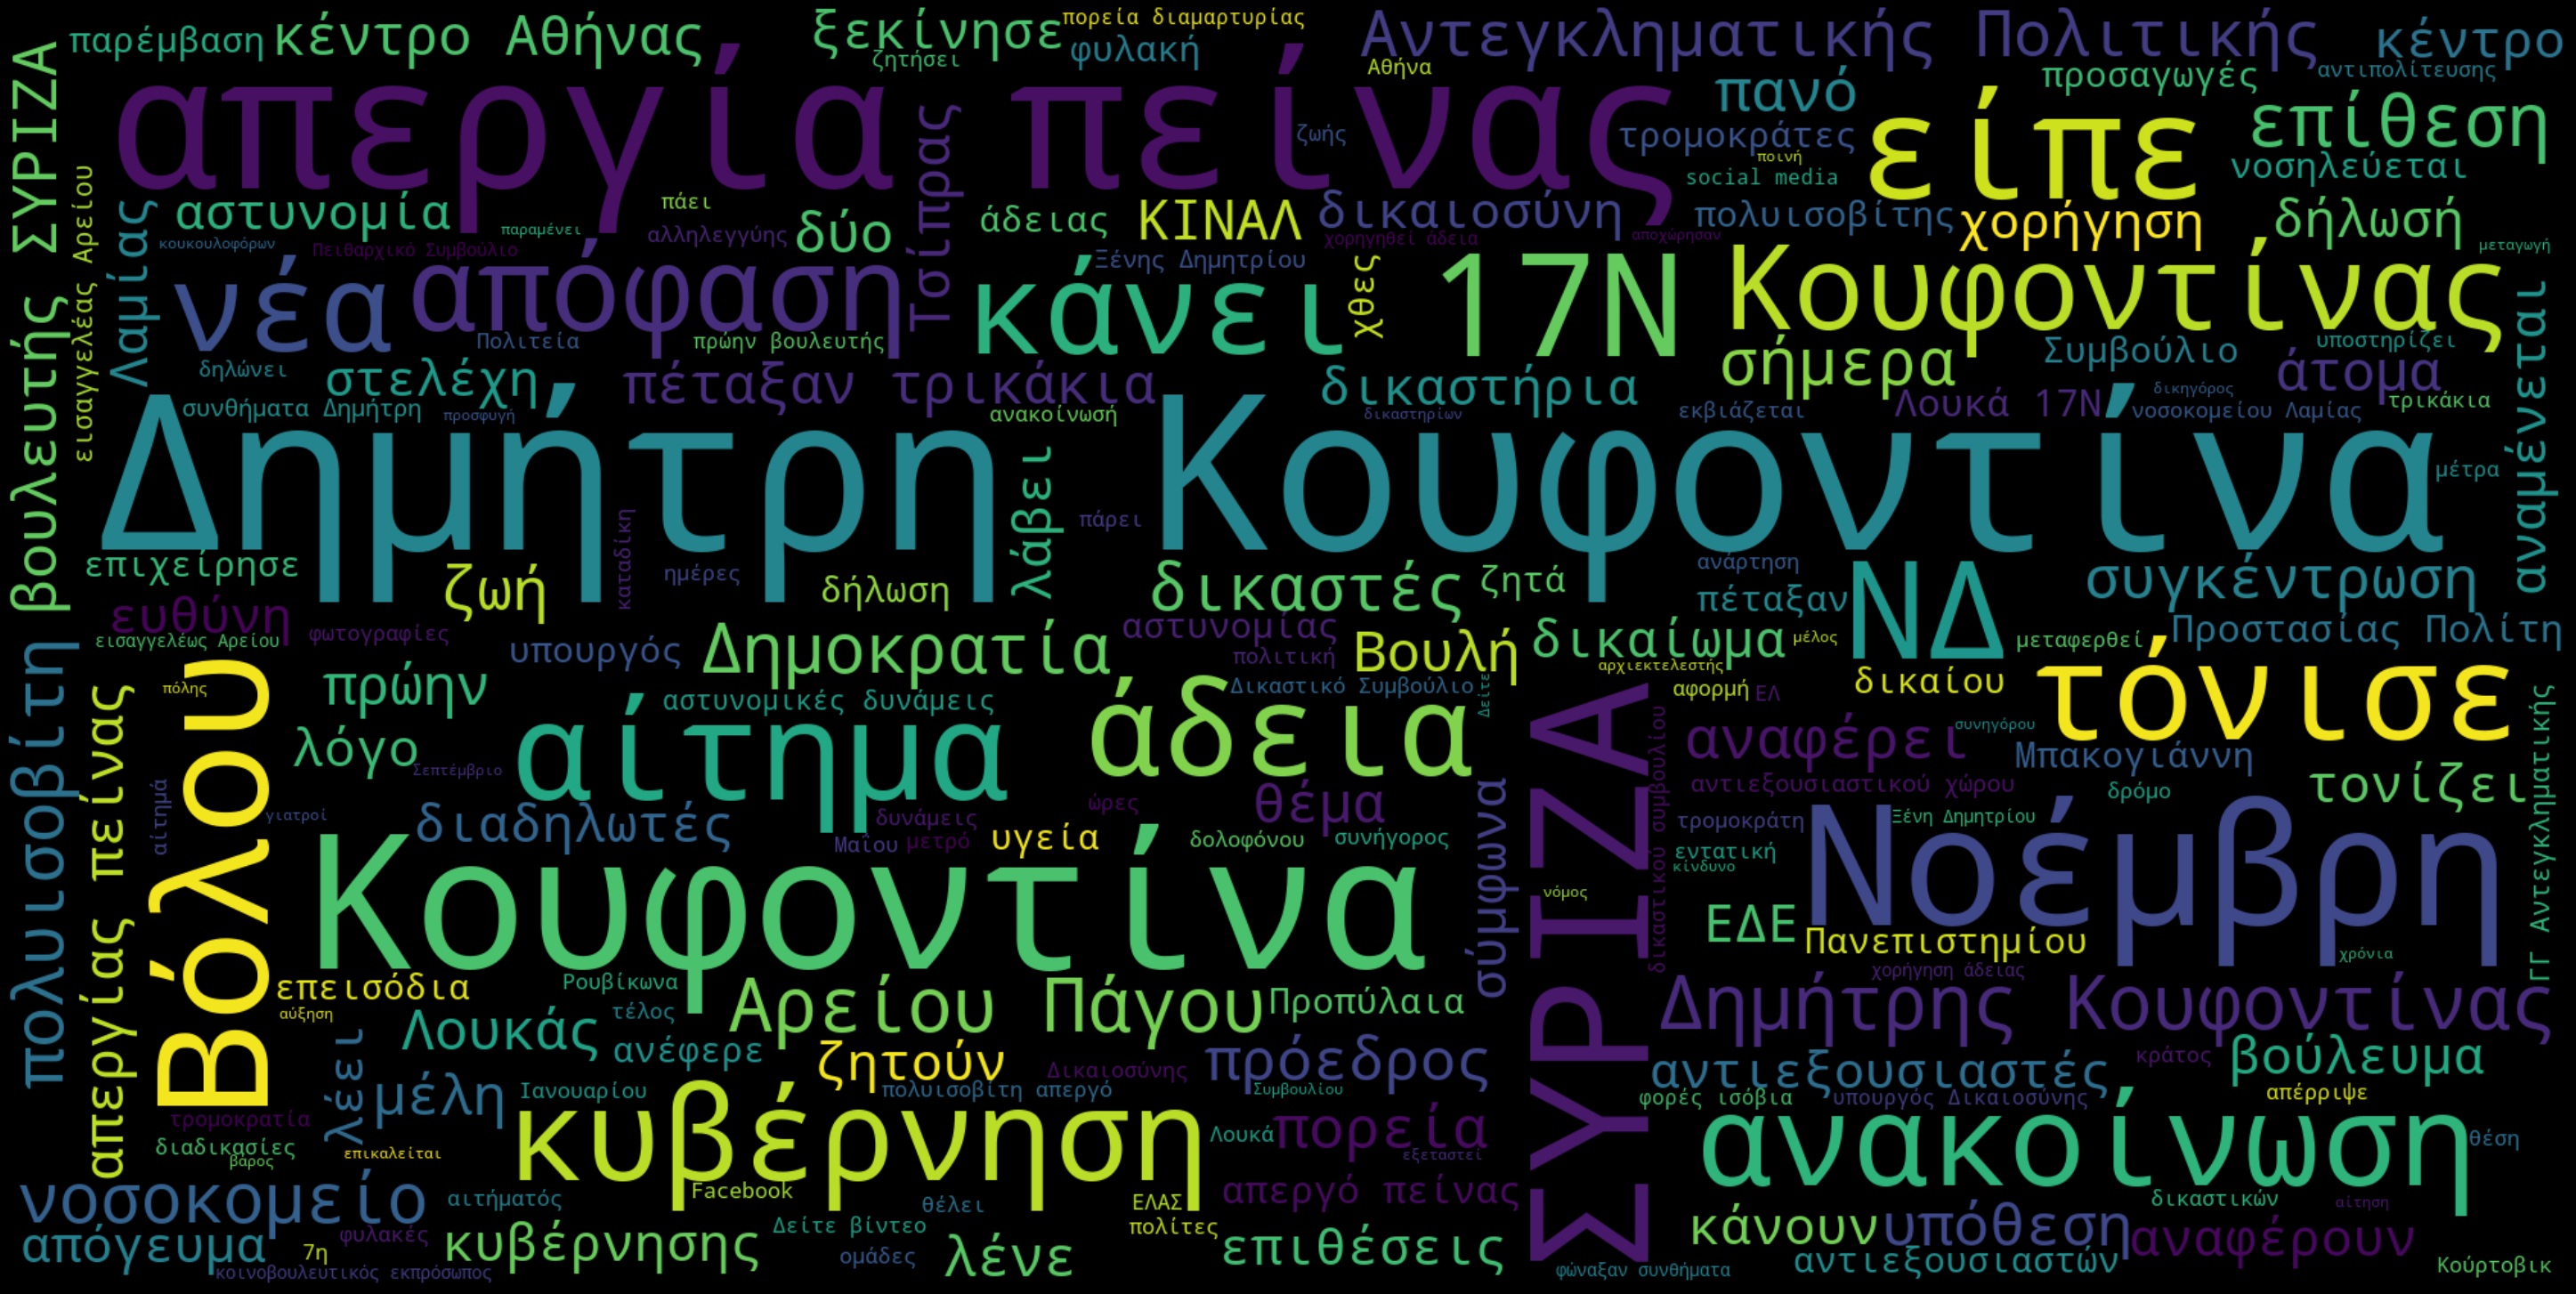

In [53]:
#na kanw wordcloud
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [54]:
full_doc = nlp(text)


In [55]:
clear_text = ' '.join(token.lemma_ for token in full_doc)


In [56]:
#βελτιώσεις στο κείμενο μου για να έχω ένα καλύτερο αποτέλεσμα στο γράφημα
clear_text = df['summary'].str.cat(sep = ' ').replace('κουφοντίνας','κουφοντίνα')
clear_text = clear_text.replace('νδ', 'κυβέρνηση')
clear_text = clear_text.replace('αίτημά', 'αίτημα')
clear_text = clear_text.replace('δημήτρης', 'δημήτρη')
clear_text = clear_text.replace('νοέμβρη', '17ν')
clear_text = clear_text.replace('Κουφοντίνας', 'δημήτρη κουφοντίνα')
clear_text = clear_text.replace('δημήτρης κουφοντίνας', 'δημήτρη κουφοντίνα')
clear_text = clear_text.replace('κουφοντίνα', 'δημήτρη κουφοντίνα')
clear_text = clear_text.replace('νοσηλεύεται', 'εντατική')


clear_text = clear_text.replace('δηλώνω', '')
clear_text = clear_text.replace('είπε', '')
clear_text = clear_text.replace('αναφέρει', '')
clear_text = clear_text.replace('αναφέρουν', '')

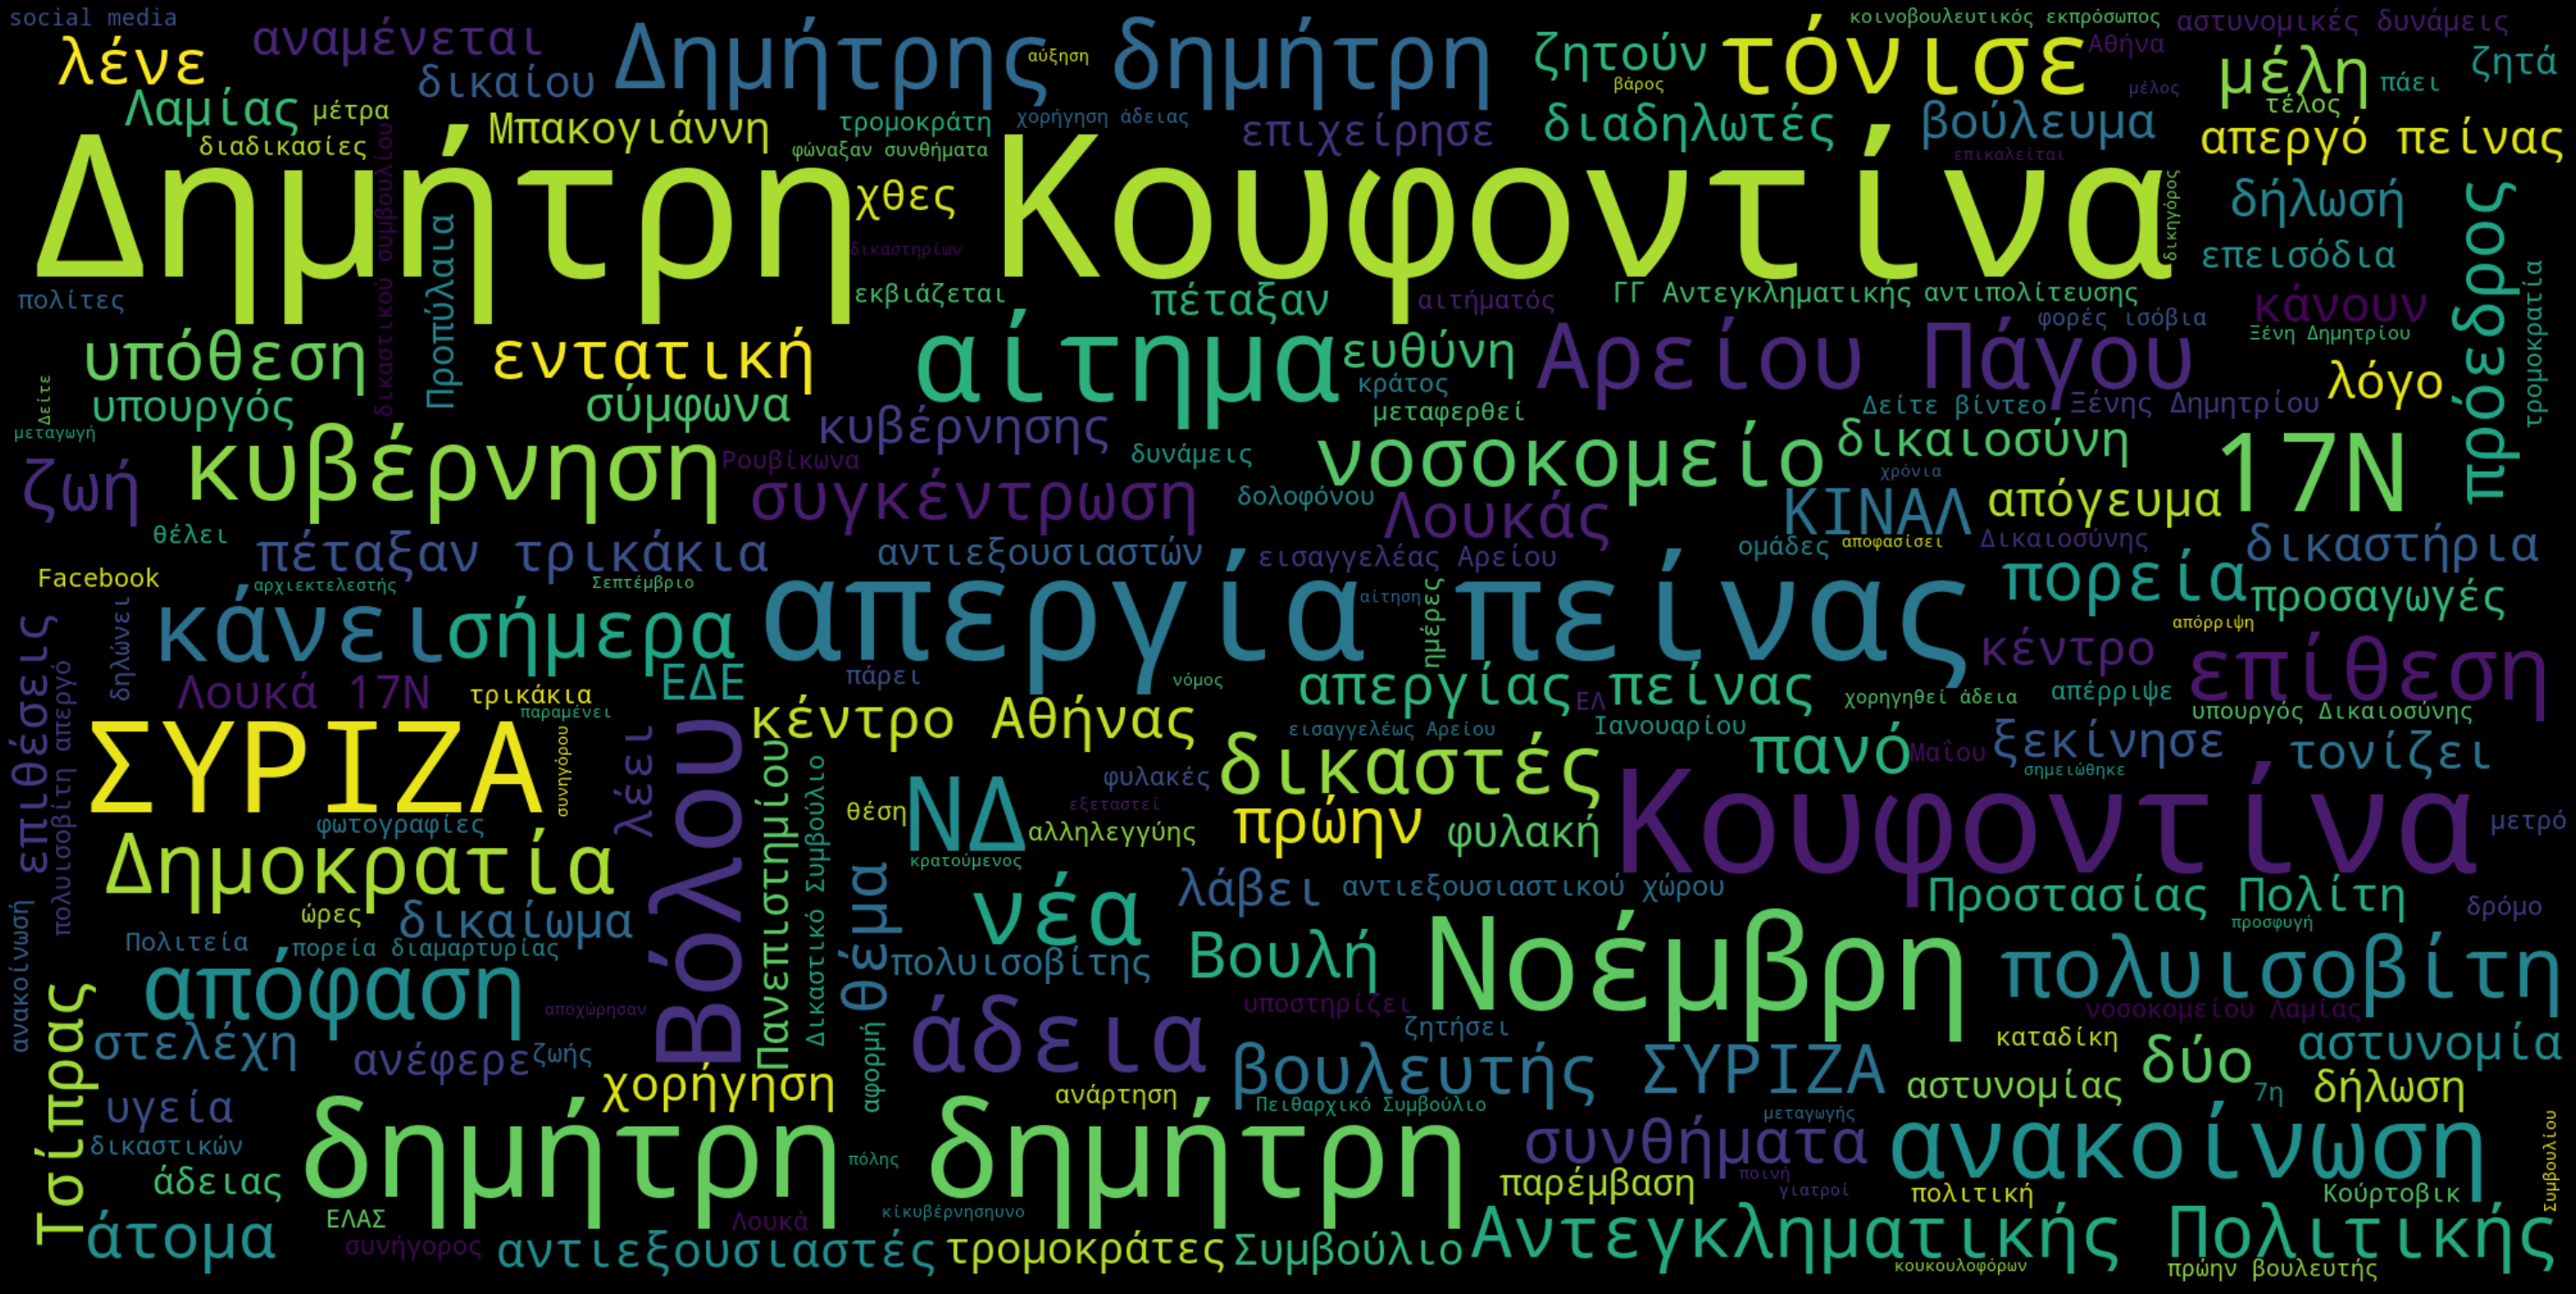

In [57]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Vectorization

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [59]:
count_vector = cv.fit_transform(df['summary'])

In [60]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


00  000  02  10  100  11  110α  ...  ύψη  ύψιστο  ύψος  ύψωσαν  ώρα  ώρες  ώστε
0   0    0   0   0    0   0     0  ...    0       0     0       0    0     0     0
1   0    0   0   0    0   0     0  ...    0       0     0       0    0     0     0
2   0    0   0   0    0   0     0  ...    0       0     0       0    0     0     0
3   0    0   0   0    0   0     0  ...    0       0     0       0    0     0     0
4   0    0   0   0    0   0     0  ...    0       0     0       0    0     0     0

[5 rows x 2303 columns]

In [61]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [62]:
count_vector = cv.fit_transform(df['summary'])

In [63]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


11  17  17ν  7η  facebook  ...  χθες  χορήγηση  χορηγηθεί  χώρου  ώρες
0   0   0    1   0         0  ...     0         0          0      0     0
1   0   0    0   0         0  ...     0         0          0      0     0
2   0   0    0   0         0  ...     0         0          0      0     0
3   0   0    0   0         0  ...     0         0          0      0     0
4   0   0    0   0         0  ...     0         0          0      0     0

[5 rows x 198 columns]

In [64]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [65]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['summary'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  ...  χώρα  χώρο  ώρες
0                 1                      1    0  ...     0     0     0
1                 0                      0    0  ...     0     0     0
2                 1                      1    0  ...     0     0     0
3                 1                      1    0  ...     0     0     0
4                 0                      1    0  ...     0     0     0

[5 rows x 213 columns]

In [66]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['summary'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()




17  17ν  άδεια  αίτημα  ...  πείνας  πολυισοβίτη  συριζα  τόνισε
0   0    1      0       1  ...       0            0       0       0
1   0    0      0       1  ...       0            0       0       0
2   0    0      0       0  ...       0            0       0       0
3   0    0      0       0  ...       0            0       0       0
4   0    0      0       0  ...       0            0       0       0

[5 rows x 20 columns]

In [67]:
results.sum(axis =0).sort_values(ascending = False)


κουφοντίνα     71
πείνας         43
δημήτρη        42
απεργία        31
συριζα         31
17ν            26
νοέμβρη        24
κουφοντίνας    24
17             23
άδεια          21
βόλου          20
είπε           18
αίτημα         16
νδ             15
τόνισε         15
κάνει          14
κυβέρνηση      14
ανακοίνωση     14
πολυισοβίτη    14
βουλευτής      13
dtype: int64

In [68]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


κουφοντίνα    71
πείνας        43
δημήτρη       42
απεργία       31
συριζα        31
dtype: int64

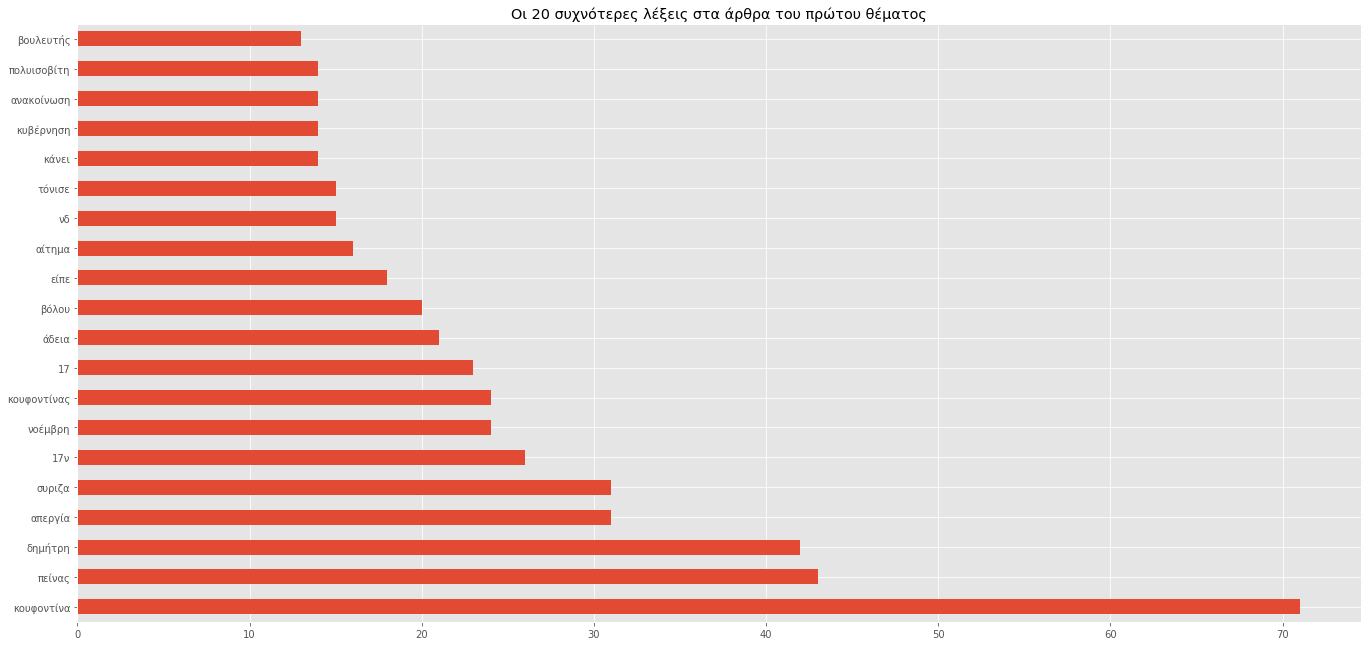

In [69]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(23,11), title="Οι 20 συχνότερες λέξεις στα άρθρα του πρώτου θέματος")

In [70]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()




104  άδεια  αίτημα  αθήνας  ...  πορεία  συγκέντρωση  συριζα  φυλακές
0    0      0       0       0  ...       0            0       0        0
1    0      0       0       0  ...       0            0       0        0
2    0      0       0       0  ...       0            0       0        0
3    0      0       0       0  ...       0            0       0        0
4    0      0       0       0  ...       0            0       0        0

[5 rows x 20 columns]

In [71]:
results.sum(axis =0).sort_values(ascending = False)


κουφοντίνα     198
κουφοντίνας     54
συριζα          27
άδεια           26
δημήτρη         19
επίθεση         18
απεργία         17
πείνας          17
νδ              17
κέντρο          17
θεσσαλονίκη     17
συγκέντρωση     16
αίτημα          16
θεμα            15
αθήνας          15
104             15
πορεία          15
δημήτρης        14
φυλακές         12
δικαστές        11
dtype: int64

In [72]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


κουφοντίνα     198
κουφοντίνας     54
συριζα          27
άδεια           26
δημήτρη         19
dtype: int64

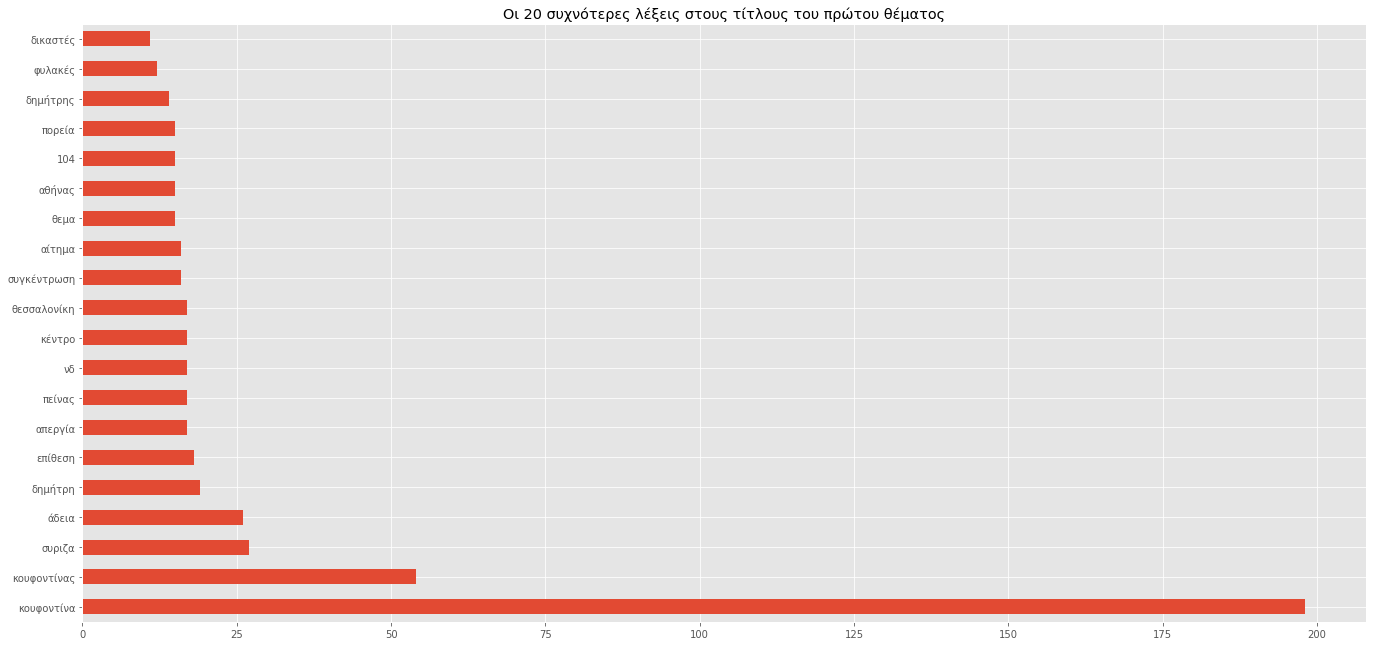

In [73]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(23,11), title="Οι 20 συχνότερες λέξεις στους τίτλους του πρώτου θέματος")

In [74]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκο[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


κοινοβούλιο  κοινωνίας  κοκκινόπουλο  ...  κουφοντίνα  κουφοντίνας  κούρτοβικ
0            0          0             0  ...           0            1          0
1            0          0             0  ...           0            1          0
2            0          0             0  ...           0            0          0
3            0          0             0  ...           1            0          0
4            0          0             0  ...           0            0          0

[5 rows x 15 columns]

In [75]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

17 νοέμβρη  αντεγκληματικής πολιτικής  ...  συνθήματα δημήτρη  χορηγηθεί άδεια
0           0                          0  ...                  0                0
1           0                          0  ...                  0                0
2           0                          0  ...                  0                0
3           0                          0  ...                  0                0
4           0                          0  ...                  0                0

[5 rows x 20 columns]

In [76]:
results.sum(axis =0).sort_values(ascending = False)

δημήτρη κουφοντίνα           41
απεργία πείνας               30
17 νοέμβρη                   23
δημήτρης κουφοντίνας         12
αρείου πάγου                 12
αντεγκληματικής πολιτικής     9
βουλευτής συριζα              8
πέταξαν τρικάκια              7
κέντρο αθήνας                 7
απεργίας πείνας               7
απεργό πείνας                 6
προστασίας πολίτη             6
λουκά 17ν                     6
αντιεξουσιαστικού χώρου       5
γγ αντεγκληματικής            5
αστυνομικές δυνάμεις          5
συνθήματα δημήτρη             5
εισαγγελέας αρείου            5
ξένης δημητρίου               5
χορηγηθεί άδεια               4
dtype: int64

In [77]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


δημήτρη κουφοντίνα      41
απεργία πείνας          30
17 νοέμβρη              23
δημήτρης κουφοντίνας    12
αρείου πάγου            12
dtype: int64

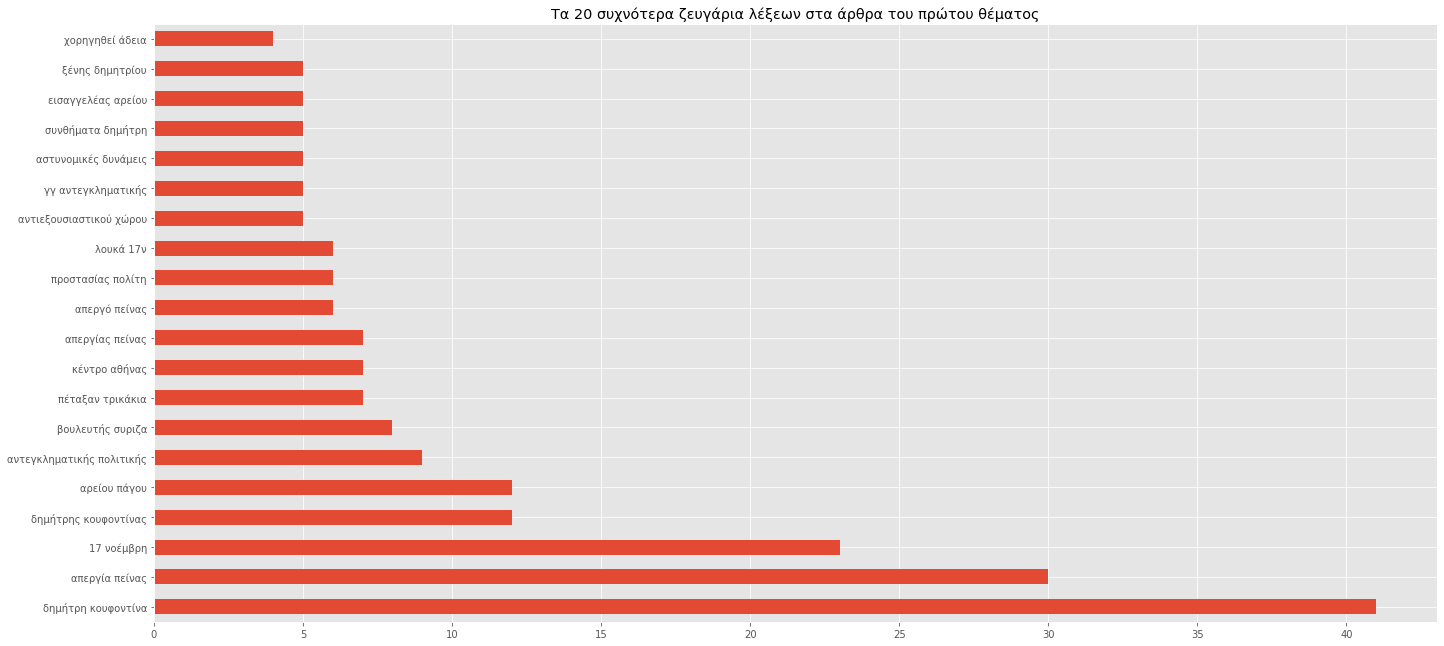

In [78]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(23,11), title="Τα 20 συχνότερα ζευγάρια λέξεων στα άρθρα του πρώτου θέματος")

In [79]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

17 νοέμβρη  άδεια κουφοντίνα  ...  τρικάκια κουφοντίνα  φυλακές δομοκού
0           0                 0  ...                    0                0
1           0                 0  ...                    0                0
2           1                 0  ...                    0                0
3           0                 0  ...                    0                0
4           0                 0  ...                    0                0

[5 rows x 20 columns]

In [80]:
results.sum(axis =0).sort_values(ascending = False)

άδεια κουφοντίνα          22
δημήτρη κουφοντίνα        18
απεργία πείνας            17
θεμα 104                  15
δημήτρης κουφοντίνας      14
κέντρο αθήνας             14
κουφοντίνα κέντρο         11
συγκέντρωση κουφοντίνα    10
αίτημα κουφοντίνα          7
αρείου πάγου               7
φυλακές δομοκού            6
δικαστών εισαγγελέων       6
πορεία κουφοντίνα          6
πείνας κουφοντίνα          5
τρικάκια κουφοντίνα        4
δείτε βίντεο               4
δήλωση δρίτσα              4
ποινικό κώδικα             4
ένωση δικαστών             4
17 νοέμβρη                 4
dtype: int64

In [81]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


άδεια κουφοντίνα        22
δημήτρη κουφοντίνα      18
απεργία πείνας          17
θεμα 104                15
δημήτρης κουφοντίνας    14
dtype: int64

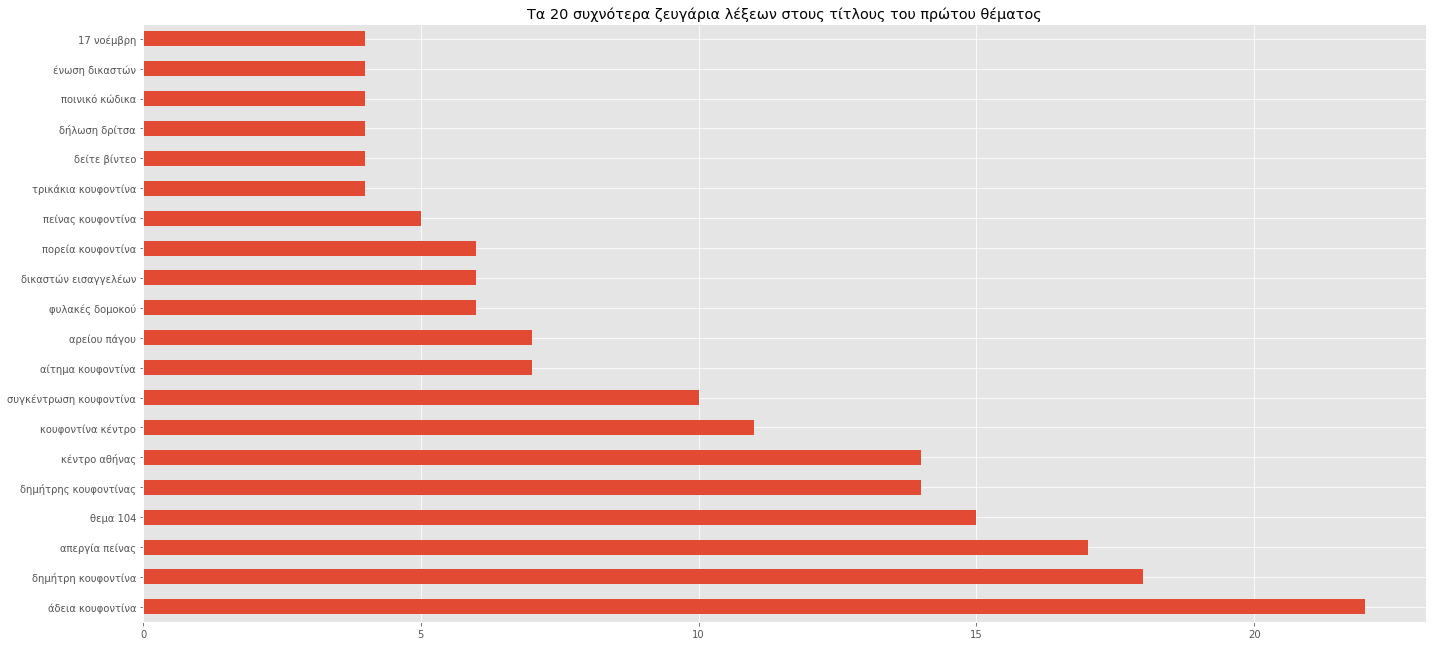

In [82]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(23,11), title="Τα 20 συχνότερα ζευγάρια λέξεων στoυς τίτλους του πρώτου θέματος")

In [83]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bα[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()




αίτημα  αίτηση  αθήνας  αιχμές  ...  απόρριψης  απόφαση  απόφασης  αρείου
0       0       0       0       0  ...          0        0         0       0
1       0       1       0       0  ...          0        0         0       0
2       0       0       0       0  ...          0        0         0       0
3       0       0       0       1  ...          0        0         0       0
4       0       0       0       0  ...          0        0         0       0

[5 rows x 20 columns]

In [84]:
results.sum(axis =0).sort_values(ascending = False)

απεργία            17
αίτημα             16
αθήνας             15
αίτηση              9
αρείου              7
απορρίφθηκε         6
απόφαση             6
αντιεξουσιαστές     6
αντιεξουσιαστών     5
ανακοίνωση          5
αποφυλάκισης        3
απέρριψε            3
αντιδράσεις         3
αναρχικοί           3
ανακοίνωσης         3
ανάληψη             3
αιχμές              3
απόρριψη            2
απόφασης            2
απόρριψης           2
dtype: int64

In [85]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['κουφοντίνα', '17 Νοέμβρη']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


κουφοντίνα  17 Νοέμβρη
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0

In [86]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['summary'])  #finds the tfidf score with normalization


In [88]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

11   17      17ν        29   41  ...      όρων  ύψη  ύψιστο  ύψος  ώρες
0  0.0  0.0  0.15123  0.000000  0.0  ...  0.234169  0.0     0.0   0.0   0.0
1  0.0  0.0  0.00000  0.000000  0.0  ...  0.380443  0.0     0.0   0.0   0.0
2  0.0  0.0  0.00000  0.000000  0.0  ...  0.000000  0.0     0.0   0.0   0.0
3  0.0  0.0  0.00000  0.353078  0.0  ...  0.000000  0.0     0.0   0.0   0.0
4  0.0  0.0  0.00000  0.000000  0.0  ...  0.000000  0.0     0.0   0.0   0.0

[5 rows x 500 columns]

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.22733916 0.09869559 0.         0.         0.08204426
  0.         0.08101814 0.08316585 0.         0.0439353  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.0406295  0.         0.         0.
  0.         0.         0.         0.05245859 0.         0.
  0.03238495 0.05994714 0.11890323 0.         0.21990482 0.
  0.         0.         0.08228691 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.03056007 0.         0.
  0.12495216 0.03780558 0.         0.07937685 0.         0.06837512
  0.         0.04272069 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.02715016 0.         0.         0.         0.         0.02611021
  0.10968717 0.         0.         0.07553944 0.         0.
  0.         0.         0.         0.         0.         

In [90]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.22733916 0.09869559 ... 0.         0.09462817 0.        ]
 [0.22733916 1.         0.16034571 ... 0.         0.         0.        ]
 [0.09869559 0.16034571 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.09462817 0.         0.         ... 0.         1.         0.12136648]
 [0.         0.         0.         ... 0.         0.12136648 1.        ]]


In [91]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

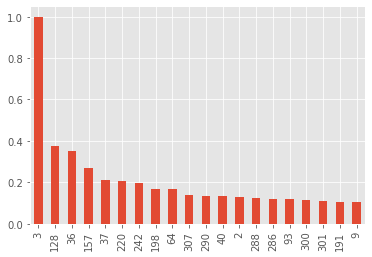

In [92]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [93]:
#make heatmap
import seaborn as sns; sns.set_theme()

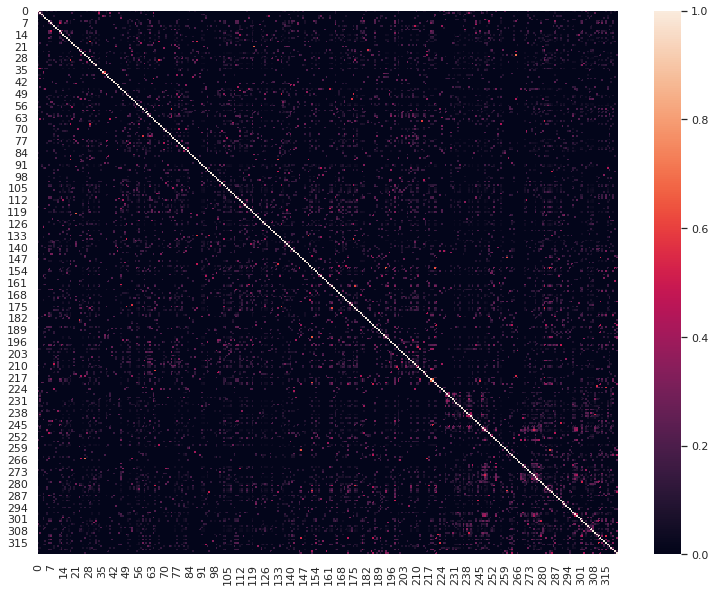

In [94]:
ax = plt.subplots(figsize=(13,10))# Sample figsize in inches
ax = sns.heatmap(arr)